### Importing all the required libraries

In [ ]:
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import gzip
from sklearn.metrics import accuracy_score
import keras
from PIL import Image
import os
from sklearn import metrics

### Creating MNIST dataset

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

### Creating USPS dataset

In [3]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

### Logistic Regression

Accuracy for MNIST using Logistic Regression
0.75216


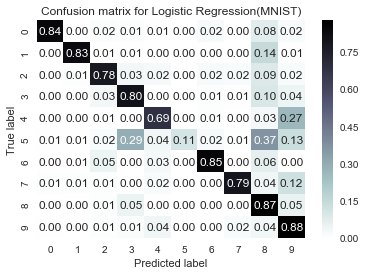

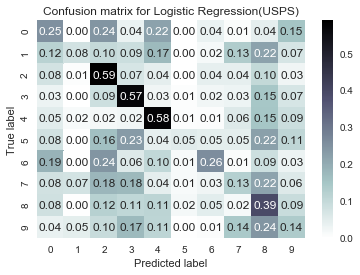

Accuracy for USPS using Logistic Regression
0.30396519825991297


In [15]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

training_ip = training_data[0]
training_op = training_data[1]
test_ip = test_data[0]
test_op = test_data[1]
USPSMat_lr=np.asarray(USPSMat)
USPSTar_lr=np.asarray(USPSTar)
learning_rate=12

training_op=keras.utils.to_categorical(training_op,10)
USPSTar_lr=keras.utils.to_categorical(USPSTar_lr,10)


w=np.ones((784,10))
y_predicted=np.random.randint(2,size=(50000,10))
for iter in range(0,500):
    z=np.dot(training_ip,w)
  
    for i in range(len(y_predicted)):
        y_predicted[i]=softmax(z[i])
    sub=np.subtract(y_predicted,training_op)
    w_feature=np.dot(np.transpose(training_ip),sub)
    w_feature=np.dot((1/len(training_ip)),w_feature)    
    w_feature=-np.dot(learning_rate,w_feature)
    w_next=np.add(w,w_feature)
    w=w_next
    pred=np.dot(training_ip,w)
    temp=accuracy_score(training_op.argmax(axis=1),pred.argmax(axis=1))
    if(temp>.75):
        learning_rate=10
        break
pred=np.dot(training_ip,w)
acc_MNIST=accuracy_score(training_op.argmax(axis=1),pred.argmax(axis=1))
print("Accuracy for MNIST using Logistic Regression")
print(acc_MNIST)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(training_op.argmax(axis=1), pred.argmax(axis=1))
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
#ax.set_aspect(1)
plt.title("Confusion matrix for Logistic Regression(MNIST)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

pred1=np.dot(USPSMat_lr,w)
acc_USPS=accuracy_score(USPSTar_lr.argmax(axis=1),pred1.argmax(axis=1))
cm = confusion_matrix(USPSTar_lr.argmax(axis=1), pred1.argmax(axis=1))
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
#ax.set_aspect(1)
plt.title("Confusion matrix for Logistic Regression(USPS)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

print("Accuracy for USPS using Logistic Regression")
print(acc_USPS)



### Neural Networks

C:\Users\sassi\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=397)`


Epoch 1/10
50000/50000 [==============================] - 9s 174us/step - loss: 0.5585 - acc: 0.8439
Epoch 2/10
50000/50000 [==============================] - 7s 137us/step - loss: 0.2408 - acc: 0.9281
Epoch 3/10
50000/50000 [==============================] - ETA: 0s - loss: 0.1814 - acc: 0.9453 - 6s 114us/step - loss: 0.1813 - acc: 0.9453
Epoch 4/10
50000/50000 [==============================] - 6s 111us/step - loss: 0.1403 - acc: 0.9573
Epoch 5/10
50000/50000 [==============================] - 5s 104us/step - loss: 0.1127 - acc: 0.9662
Epoch 6/10
50000/50000 [==============================] - 5s 106us/step - loss: 0.0917 - acc: 0.9725
Epoch 7/10
50000/50000 [==============================] - 5s 107us/step - loss: 0.0732 - acc: 0.9787
Epoch 8/10
50000/50000 [==============================] - 5s 107us/step - loss: 0.0610 - acc: 0.9816
Epoch 9/10
50000/50000 [==============================] - 5s 106us/step - loss: 0.0499 - acc: 0.9849
Epoch 10/10
50000/50000 [===========================

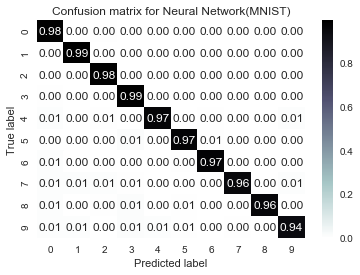

Final accuracy (on MNIST data): 0.97


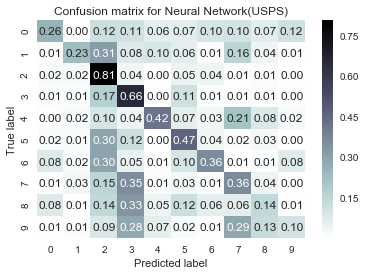

Final accuracy (on USPS data): 0.35


In [35]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()
X_train=training_data[0]
y_train=training_data[1]
X_test=test_data[0]
y_test=test_data[1]


# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

# Initialising the ANN
classifier_NN = Sequential()

# Adding the input layer and the first hidden layer
classifier_NN.add(Dense(units = 397, activation = 'sigmoid', input_dim = 784))

# Adding the second hidden layer
classifier_NN.add(Dense(output_dim = 397, activation = 'sigmoid'))

# Adding the output layer
classifier_NN.add(Dense(units = 10, activation = 'softmax'))

# Compiling the ANN
classifier_NN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier_NN.fit(X_train, y_train, batch_size=128, epochs=10)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier_NN.predict(X_test)
y_pred=(y_pred>0.5)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
plt.title("Confusion matrix for Neural Network(MNIST)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


accuracy = metrics.accuracy_score(y_test, y_pred)
print("Final accuracy (on MNIST data): %0.2f" % accuracy)


USPSMat_nn=np.asarray(USPSMat)
USPSTar_nn=np.asarray(USPSTar)            
USPSTar_nn=keras.utils.to_categorical(USPSTar_nn,10)
            
USPS_pred = classifier_NN.predict(USPSMat_nn)
USPS_pred=(USPS_pred>0.3)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(USPSTar_nn.argmax(axis=1), USPS_pred.argmax(axis=1))
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
plt.title("Confusion matrix for Neural Network(USPS)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


accuracy = metrics.accuracy_score(USPSTar_nn, USPS_pred)
print("Final accuracy (on USPS data): %0.2f" % accuracy)



### Random Forest

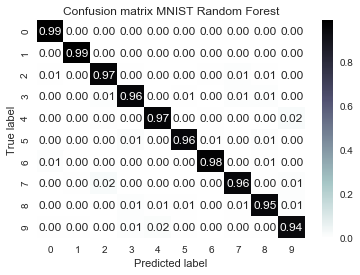

Final accuracy of Random Forest(on MNIST data) : 0.97


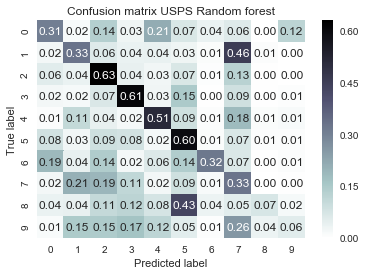

Final accuracy of Random(on USPS data) : 0.38


In [7]:
X_train_rf=training_data[0]
y_train_rf=training_data[1]
X_test_rf=test_data[0]
y_test_rf=test_data[1]


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=40)
classifier_rf.fit(X_train_rf, y_train_rf)

# Predicting the Test set results
y_pred = classifier_rf.predict(X_test_rf)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
MNISTcm_rf = confusion_matrix(y_test_rf, y_pred)
cm_normalized = MNISTcm_rf.astype("float") / MNISTcm_rf.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
plt.title("Confusion matrix MNIST Random Forest")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


accuracy = metrics.accuracy_score(y_test_rf, y_pred)
print("Final accuracy of Random Forest(on MNIST data) : %0.2f" % accuracy)

USPSMat_rf=np.asarray(USPSMat)
USPSTar_rf=np.asarray(USPSTar)
USPS_pred = classifier_rf.predict(USPSMat_rf)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
USPScm_rf = confusion_matrix(USPSTar_rf, USPS_pred)
cm_normalized =USPScm_rf.astype("float") / USPScm_rf.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
plt.title("Confusion matrix USPS Random forest")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


accuracy = metrics.accuracy_score(USPSTar_rf, USPS_pred)
print("Final accuracy of Random(on USPS data) : %0.2f" % accuracy)

### Support Vector Machine

In [ ]:
X_train_svm=training_data[0]
y_train_svm=training_data[1]
X_test_svm=test_data[0]
y_test_svm=test_data[1]


# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear')
classifier_svm.fit(X_train_svm, y_train_svm)


# Predicting the Test set results
y_pred = classifier_svm.predict(X_test_svm)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
MNISTcm_svm = confusion_matrix(y_test_svm, y_pred)
cm_normalized = MNISTcm_svm.astype("float") / MNISTcm_svm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
plt.title("Confusion matrix MNIST SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


accuracy = metrics.accuracy_score(y_test_svm, y_pred)
print("Final accuracy for SVM (on MNIST data): %0.2f" % accuracy)

USPSMat_svm=np.asarray(USPSMat)
USPSTar_svm=np.asarray(USPSTar)

USPS_pred = classifier_svm.predict(USPSMat_svm)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
USPScm_svm = confusion_matrix(USPSTar_svm, USPS_pred)
cm_normalized = USPScm_svm.astype("float") / USPScm_svm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
plt.title("Confusion matrix for USPS SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


accuracy = metrics.accuracy_score(USPSTar_svm, USPS_pred)
print("Final accuracy for SVM (on USPS data) : %0.2f" % accuracy)

### Ensemble Classifier

C:\Users\sassi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


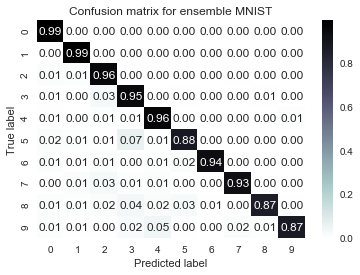

Final accuracy for ensemble (on MNIST data): 0.94


In [33]:
from sklearn.ensemble import VotingClassifier
X_train_eclf=training_data[0]
y_train_eclf=training_data[1]
X_test_eclf=test_data[0]
y_test_eclf=test_data[1]
eclf = VotingClassifier(estimators=[('rf', classifier_rf), ('svm', classifier_svm)], voting='hard')
eclf.fit(X_train_eclf,y_train_eclf)
eclf_pred=eclf.predict(X_test_eclf)
from sklearn.metrics import confusion_matrix
MNISTcm_eclf = confusion_matrix(y_test_eclf, eclf_pred)
cm_normalized = MNISTcm_eclf.astype("float") / MNISTcm_eclf.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
plt.title("Confusion matrix for ensemble MNIST")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()
accuracy = metrics.accuracy_score(y_test_eclf, eclf_pred)
print("Final accuracy for ensemble (on MNIST data): %0.2f" % accuracy)

C:\Users\sassi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


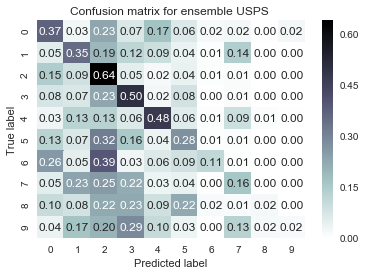

Final accuracy for SVM (on USPS data) : 0.29


In [34]:
USPSMat_eclf=np.asarray(USPSMat)
USPSTar_eclf=np.asarray(USPSTar)

USPS_pred = eclf.predict(USPSMat_eclf)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
USPScm_svm = confusion_matrix(USPSTar_eclf, USPS_pred)
cm_normalized = USPScm_svm.astype("float") / USPScm_svm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1)
ax = sns.heatmap(cm_normalized, cmap="bone_r",annot=True,fmt='.2f')
plt.title("Confusion matrix for ensemble USPS ")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


accuracy = metrics.accuracy_score(USPSTar_svm, USPS_pred)
print("Final accuracy for Ensemble (on USPS data) : %0.2f" % accuracy)